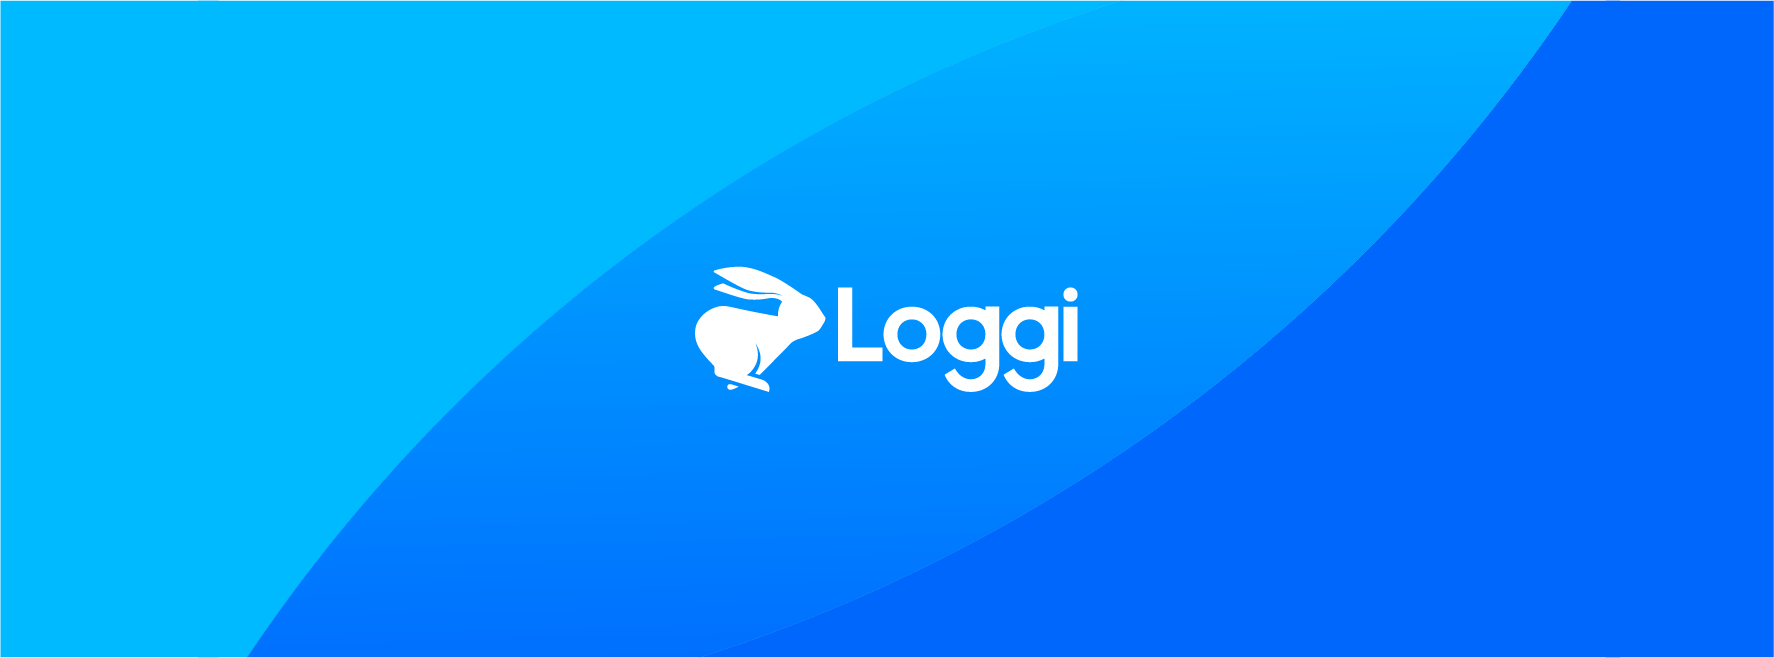

#**Limpeza e Análise exploratoria de dados da empresa Loggi!**

# Sumário

* **1.Resumo**
* 1.1. Sobre a Empresa
* **2.Pacotes e bibliotecas**
* **3.Extração e leitura dos dados**
* **4.Análise da situação inicial dos dados**
* **5.Limpeza dos dados**
* 5.1.Manipulação das colunas que estão como dicionário
* 5.2.Manipulação dos dados nulos ou vazios
* **6.Análise dos dados limpos**
* 6.1.Plot e resumo de dados para usar nos gráficos
* 6.2.Gráficos
* **7.Resumo**

# 1.Resumo

## 1.1. Sobre a Empresa


A Loggi é uma empresa brasileira de logística com [know-how](https://pt.wikipedia.org/wiki/Saber-fazer#:~:text=O%20termo%20em%20ingl%C3%AAs%20know,de%20como%20executar%20alguma%20tarefa.) tecnológico que atua principalmente no setor de e-commerce. Fundada em 2013 pelo empreendedor francês Fabien Mendez e pelo brasileiro Arthur Debert, é uma das maiores transportadoras privadas do país.
Presente em todas as capitais brasileiras, movimentam mais de 300 mil pacotes por dia além de mais de 400 transportadoras parceiras. Tudo isso para garantir uma logística com excelência e qualidade para todas as pessoas.

# 2.Pacotes e bibliotecas

!pip install geopy
!pip install geopandas
!pip install geobr
!pip install descartes #Usado para resolver um erro ao plotar o mapa.

In [1]:
import pandas as pd
import requests
import seaborn as sns
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt

# 3.Extração e leitura dos dados

In [2]:
url = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json' #Adicionando o link à variável
filename = 'deliveries.json' #Atribuindo o nome do arquivo à variável
response = requests.get(url) #Adicionando o requests à uma variável
with open(filename, 'wb') as fp: #Criando o arquivo
    fp.write(response.content)


In [3]:
url = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv'
filename = 'deliveries-geodata.csv'
response = requests.get(url)
with open(filename, 'wb') as fp:
    fp.write(response.content)


In [4]:
info_bases = pd.read_json("deliveries.json") #Lendo o arquivo e o adicionando à um dataframe

In [5]:
info_entregas = pd.read_csv("deliveries-geodata.csv", header = 0) #Lendo o arquivo e o adicionando à um dataframe e dizendo ao pandas que a linha 0 vai ser o cabeçalho

# 4.Análise da situação inicial dos dados

In [6]:
info_bases.head() #Analisando as 5 primeiras linhas do dataframe

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [7]:
info_entregas.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [8]:
info_bases.dtypes #Analisando o tipo dos dados do dataframe

name                object
region              object
origin              object
vehicle_capacity     int64
deliveries          object
dtype: object

In [9]:
info_entregas.dtypes

delivery_lng       float64
delivery_lat       float64
delivery_city       object
delivery_suburb     object
dtype: object

In [10]:
info_entregas.info() #Analisando dados nulos ou vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   delivery_lng     636149 non-null  float64
 1   delivery_lat     636149 non-null  float64
 2   delivery_city    634447 non-null  object 
 3   delivery_suburb  476264 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.4+ MB


In [11]:
info_bases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


# 5.*Limpeza* dos dados

## 5.1.Manipulação das colunas que estão como dicionario

In [12]:
info_bases = pd.merge(left=info_bases, right=info_entregas, how="inner", left_index=True, right_index=True) #Fazendo a junção dos dois dataframes usando merge
info_bases.head() #Visualizando

#Note que a coluna origin está como dicionário, então usaremos a função json_normalize para separar por colunas, o nome das colunas vai ser a chave de cada dado no dic

,name,region,origin,vehicle_capacity,deliveries,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [13]:
info_bases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              199 non-null    object 
 1   region            199 non-null    object 
 2   origin            199 non-null    object 
 3   vehicle_capacity  199 non-null    int64  
 4   deliveries        199 non-null    object 
 5   delivery_lng      199 non-null    float64
 6   delivery_lat      199 non-null    float64
 7   delivery_city     199 non-null    object 
 8   delivery_suburb   192 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 15.5+ KB


In [14]:
info_bases_normalized= pd.json_normalize(info_bases["origin"]) #Usando o json_normalize

In [15]:
info_bases_normalized.head() #Analisando como ficaram os dados no dataframe

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [16]:
info_bases = pd.merge(left=info_bases, right=info_bases_normalized, how="inner", left_index=True, right_index=True) #Fazendo a junção dos dataframes usando merge
info_bases.head() #Analisando como ficaram os dados
info_bases.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              199 non-null    object 
 1   region            199 non-null    object 
 2   origin            199 non-null    object 
 3   vehicle_capacity  199 non-null    int64  
 4   deliveries        199 non-null    object 
 5   delivery_lng      199 non-null    float64
 6   delivery_lat      199 non-null    float64
 7   delivery_city     199 non-null    object 
 8   delivery_suburb   192 non-null    object 
 9   lng               199 non-null    float64
 10  lat               199 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 26.8+ KB


In [17]:
info_bases = info_bases.drop(["origin", "delivery_lat", "delivery_lng"], axis=1) #Removendo as colunas originais e deixando apenas as modificadas
info_bases = info_bases.rename(columns={
"name":"Nome",
"region": "Base",
"vehicle_capacity":"Capacidade_Veiculo",
"deliveries":"Entregas",
"lng":"lng_base",
"lat":"lat_base",
"delivery_city": "Cidade_entrega",
"delivery_suburb":"Região_entrega"
}) #Renomeando cada coluna para minha organização

info_bases = info_bases[["Nome", "Base", "lng_base", "lat_base", "Cidade_entrega", "Região_entrega","Capacidade_Veiculo", "Entregas"]] #Reordenando as colunas para minha organização

In [18]:
info_bases.head() #Analisando o dataframe

#Note que a coluna Entregas está como dicionário aninhado, então usaremos a função explode para separa-la em dics

,Nome,Base,lng_base,lat_base,Cidade_entrega,Região_entrega,Capacidade_Veiculo,Entregas
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,Ceilândia,P Sul,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [19]:
bases_exploded = info_bases[["Entregas"]].explode("Entregas") #Usando a função explode para separas o dic aninhado
bases_exploded.head() #Visualisando

,Entregas
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [20]:
bases_exploded = pd.concat([
    pd.DataFrame(bases_exploded["Entregas"].apply(lambda extrair: extrair["size"])).rename(columns={"Entregas":"Tamanho_Entrega"}),
    pd.DataFrame(bases_exploded["Entregas"].apply(lambda extrair: extrair["point"]["lng"])).rename(columns={"Entregas":"lng_entrega"}),
    pd.DataFrame(bases_exploded["Entregas"].apply(lambda extrair: extrair["point"]["lat"])).rename(columns={"Entregas":"lat_entrega"}),
],axis=1) #Concatenando as colunas a partir das chaves dos dics

In [21]:
bases_exploded.head() #Visualizando

,Tamanho_Entrega,lng_entrega,lat_entrega
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [22]:
info_bases = info_bases.drop("Entregas", axis=1) #Removendo a coluna original 
info_bases = pd.merge(left=info_bases, right=bases_exploded, how="right", left_index=True, right_index=True) #Fazendo a junção dos dataframes usando merge
info_bases.reset_index(inplace=True, drop=True) #Redefinindo os índices 
info_bases.head() #Visualizando

,Nome,Base,lng_base,lat_base,Cidade_entrega,Região_entrega,Capacidade_Veiculo,Tamanho_Entrega,lng_entrega,lat_entrega
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Ceilândia,P Sul,180,7,-48.114898,-15.858055


## 5.2.Manipulação dos dados nulos ou vazios

In [23]:
info_bases.info() #Visualizando
#Note que à alguns valores nulos nas colunas Cidade_entrega e Região_entrega, então usarei o fillna para altera-las para Indisponível

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Nome                636149 non-null  object 
 1   Base                636149 non-null  object 
 2   lng_base            636149 non-null  float64
 3   lat_base            636149 non-null  float64
 4   Cidade_entrega      636149 non-null  object 
 5   Região_entrega      608822 non-null  object 
 6   Capacidade_Veiculo  636149 non-null  int64  
 7   Tamanho_Entrega     636149 non-null  int64  
 8   lng_entrega         636149 non-null  float64
 9   lat_entrega         636149 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 48.5+ MB


In [24]:
info_bases[["Cidade_entrega", "Região_entrega"]] = info_bases[["Cidade_entrega", "Região_entrega"]].fillna("Indisponível") #Usando o fillna para alterar e renomear as colunas nulas

In [25]:
info_bases.info() #Visualizando

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Nome                636149 non-null  object 
 1   Base                636149 non-null  object 
 2   lng_base            636149 non-null  float64
 3   lat_base            636149 non-null  float64
 4   Cidade_entrega      636149 non-null  object 
 5   Região_entrega      636149 non-null  object 
 6   Capacidade_Veiculo  636149 non-null  int64  
 7   Tamanho_Entrega     636149 non-null  int64  
 8   lng_entrega         636149 non-null  float64
 9   lat_entrega         636149 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 48.5+ MB


# 6.Análise dos dados limpos

## 6.1.Plot e resumo de dados para usar nos gráficos

In [26]:
mapa_distrito = geobr.read_municipality(code_muni='DF', year=2020) #Fazendo o plot do gráfico

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [27]:
geo_base = info_bases[["Base", "lng_base", "lat_base"]].drop_duplicates().reset_index(drop= True) #Criando um dataframe para as bases no gráfico, com apenas as lat, lng e nome de cada base individualmente
geo_base_df = gpd.GeoDataFrame( geo_base, geometry=gpd.points_from_xy( geo_base["lng_base"], geo_base["lat_base"] ) )  #Usando a função GeoDataFrame para criar um geodataframe com as coordenadas geográficas dos pontos usando lng_base e lat_base
geo_base_df.info() #Visualizando

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Base      3 non-null      object  
 1   lng_base  3 non-null      float64 
 2   lat_base  3 non-null      float64 
 3   geometry  3 non-null      geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 224.0+ bytes


c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [28]:
geo_entregas_df = gpd.GeoDataFrame( info_bases, geometry=gpd.points_from_xy( info_bases["lng_entrega"], info_bases["lat_entrega"] ) ) #Criando o GeoDataFrame para as entregas
geo_entregas_df.info() #Visualizando

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Nome                636149 non-null  object  
 1   Base                636149 non-null  object  
 2   lng_base            636149 non-null  float64 
 3   lat_base            636149 non-null  float64 
 4   Cidade_entrega      636149 non-null  object  
 5   Região_entrega      636149 non-null  object  
 6   Capacidade_Veiculo  636149 non-null  int64   
 7   Tamanho_Entrega     636149 non-null  int64   
 8   lng_entrega         636149 non-null  float64 
 9   lat_entrega         636149 non-null  float64 
 10  geometry            636149 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(4)
memory usage: 53.4+ MB


In [29]:
total_entregas = info_bases['Tamanho_Entrega'].sum() #Somando o tamanho das entregas dentro da variável total_entregas

total_entregas_base = info_bases[['Base', 'Tamanho_Entrega']].groupby("Base").agg("sum").reset_index() #Selecionando e agrupando as colunas selecionadas com base na coluna Base
total_entregas_base ['porcentagem_total_entregas'] = round(total_entregas_base ['Tamanho_Entrega'] / total_entregas, 2) #Calculando a porcentagem de cada valor na coluna arredondando para duas casas decimais
total_entregas_base.rename(columns={'Tamanho_Entrega':'total_base', "Base":"região"}, inplace=True) #Renomeando as colunas
total_entregas_base #Visualizando

,região,total_base,porcentagem_total_entregas
0,df-0,385932,0.11
1,df-1,1681582,0.48
2,df-2,1439010,0.41


In [30]:
rank_cidades_entregas = info_bases["Cidade_entrega"].value_counts().reset_index() #Contando a quantidade de entregas em cada cidade
rank_cidades_entregas.rename(columns={"index":"cidade", "Cidade_entrega": "qtd_entregas"}, inplace=True) #Renomeando
rank_cidades_entregas.head() #Visualizando

,cidade,qtd_entregas
0,Gama,312054
1,Ceilândia,117466
2,Sol Nascente/Pôr do Sol,66571
3,Núcleo Bandeirante,62832
4,Águas Claras,62187


c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot: >

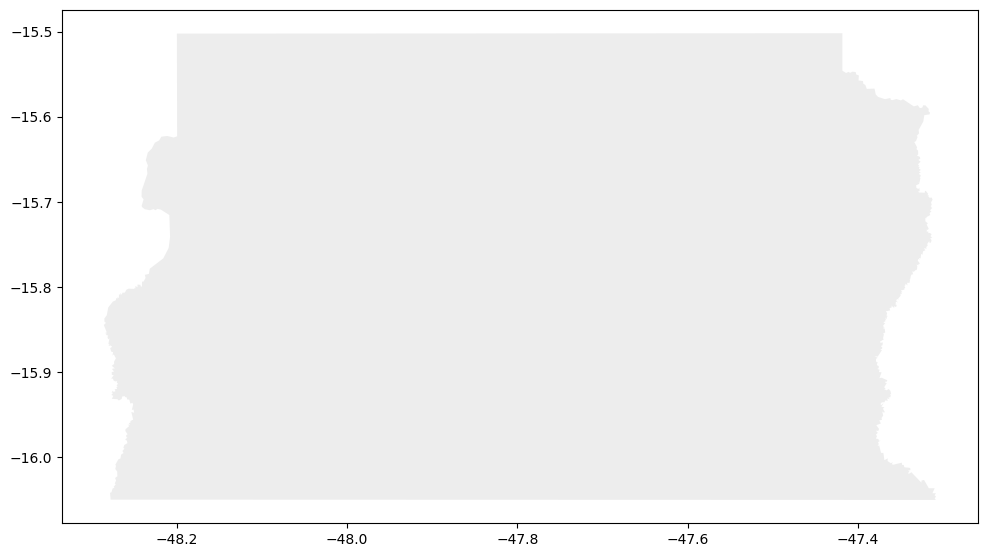

In [31]:
fig, ax = plt.subplots(figsize = (30/2.54, 30/2.54)) #Criando eixos e tamanho do gráfico
mapa_distrito.plot(ax=ax, alpha= 0.4, color= "lightgrey") #Fazendo o plot do gráfico

## 6.2.Gráficos

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


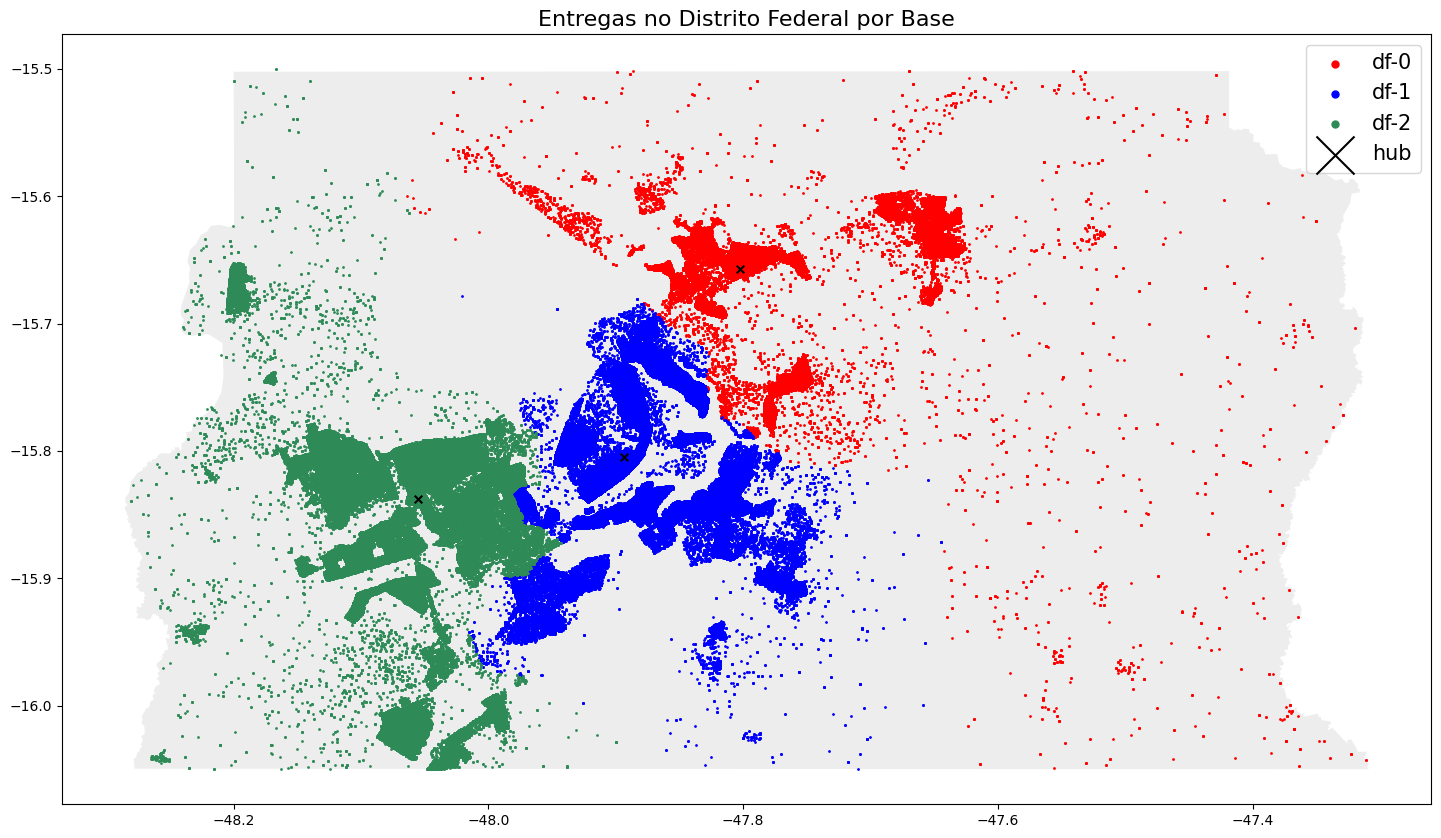

In [32]:
grafico_1, ax = plt.subplots(figsize=(40, 10))
mapa_distrito.plot(ax=ax, alpha=0.4, color="lightgrey")
#Adicionando as 3 bases e entregas no gráfico
geo_entregas_df.query("Base == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_entregas_df.query("Base == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1") 
geo_entregas_df.query("Base == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2") 

geo_base_df.plot( ax=ax, markersize=30, marker="x", color="black", label="hub" ) #Definindo tamanho, legenda e simbolo de marcação no gráfico

plt.title( "Entregas no Distrito Federal por Base", fontdict={"fontsize": 16} ) #Adicionando um título e tamanho
lgnd = plt.legend(prop={"size": 15}, markerscale=5, loc="upper right") #Definindo a posição e tamanho da legenda


[Text(0.5, 1.0, 'Gráfico 2 - Soma do volume de entregas por base'),
 Text(0.5, 0, 'Bases'),
 Text(0, 0.5, 'Quantidade de entregas (em milhares)')]

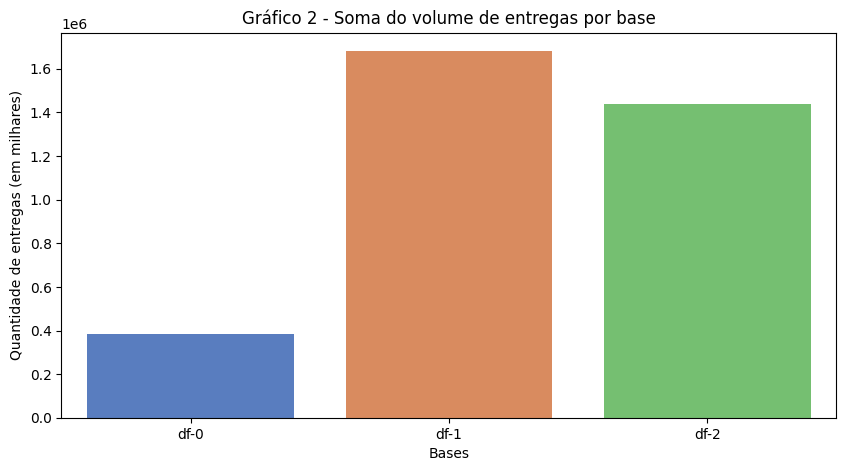

In [33]:
grafico_2 = plt.figure(figsize=(10, 5))
total_entregas_grafico = sns.barplot(data=total_entregas_base, x='região', y='total_base', ci='sd', palette='muted') #Definindo o gráfico com base na variável total_entregas_base
total_entregas_grafico.set(title='Gráfico 2 - Soma do volume de entregas por base', xlabel='Bases', ylabel='Quantidade de entregas (em milhares)')

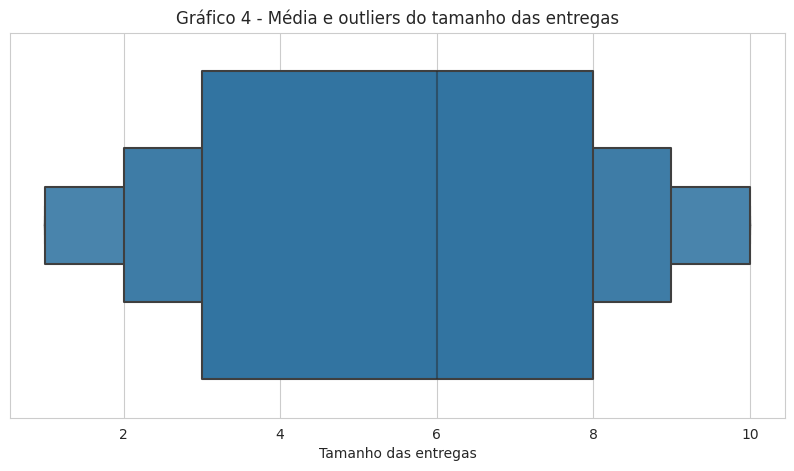

In [34]:
with sns.axes_style("whitegrid"):
  grafico_3 = plt.figure(figsize=(10, 5))
  grafico_tamanho_entregas = sns.boxenplot(x=info_bases["Tamanho_Entrega"]) #Definindo o gráfico com base na variável gráfico_tamanho_entregas
  grafico_tamanho_entregas.set(title="Gráfico 4 - Média e outliers do tamanho das entregas", xlabel="Tamanho das entregas")

[Text(0.5, 1.0, 'Gráfico 6 - Cidades com maiores incidências de entregas'),
 Text(0.5, 0, 'Quantidade de entregas (em milhares)'),
 Text(0, 0.5, 'Cidades')]

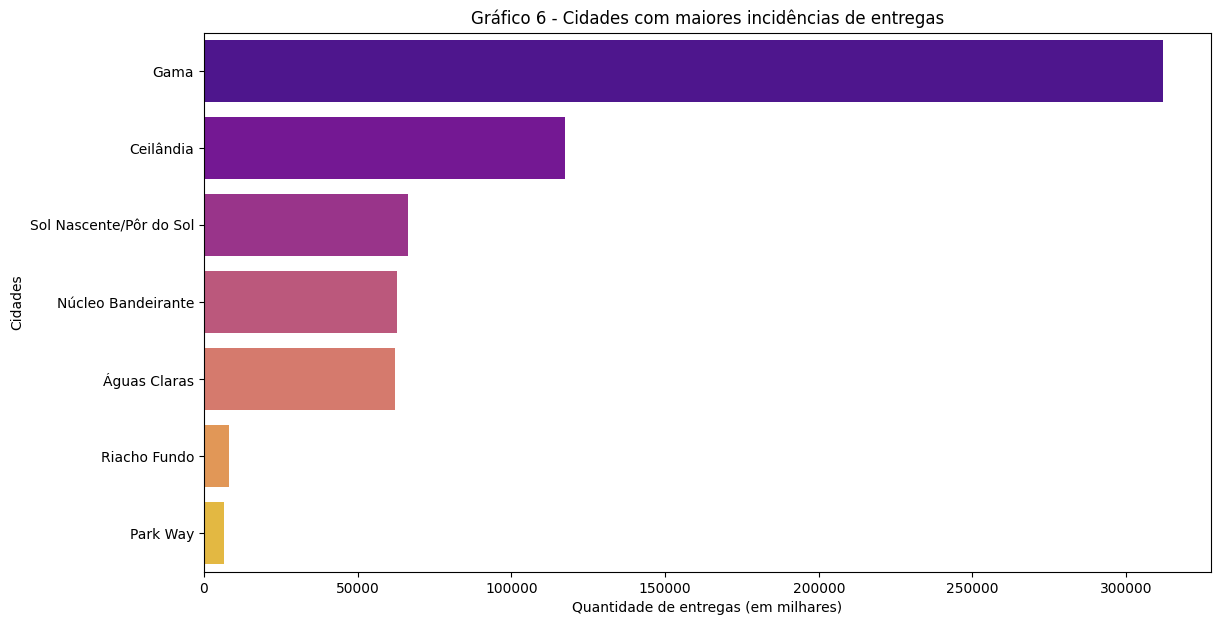

In [35]:
grafico_4 = plt.figure(figsize=(13, 7))
grafico_rank_cidades = sns.barplot(data=rank_cidades_entregas, x="qtd_entregas", y="cidade", palette= "plasma") #Definindo o gráfico com base na variável grafico_rank_cidades
grafico_rank_cidades.set(title="Gráfico 6 - Cidades com maiores incidências de entregas", xlabel="Quantidade de entregas (em milhares)", ylabel="Cidades")

# 7.Insights

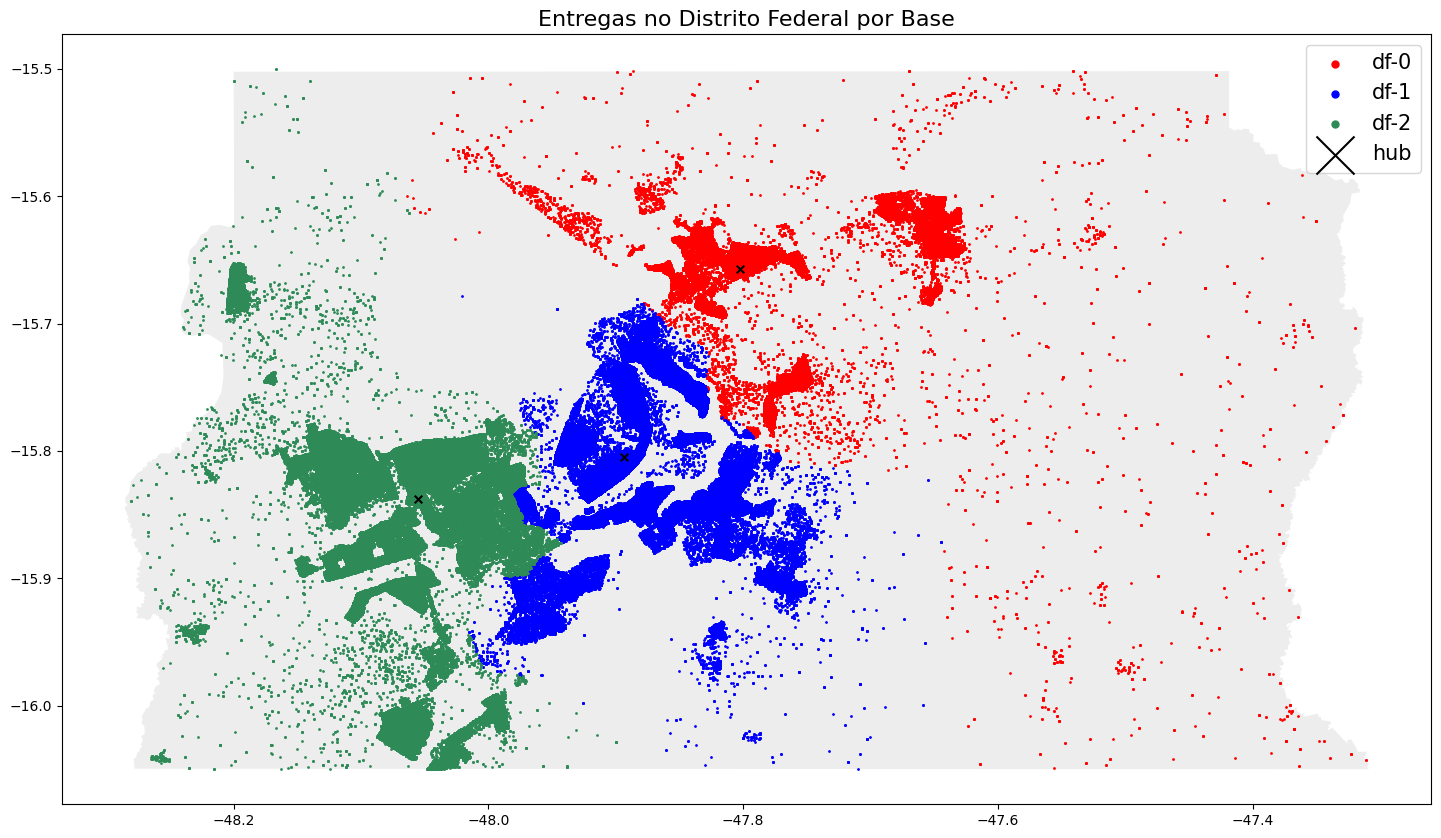

In [36]:
display(grafico_1)

**1° Insight** - No primeiro gráfico, apenas para uma visualização geral do mapa e concentração das entregas, nota-se que a grande parte das entregas estão proximas às bases e analisa-se que na base 0 uma grande parte das entregas se distribuem pelo lado direito do mapa.

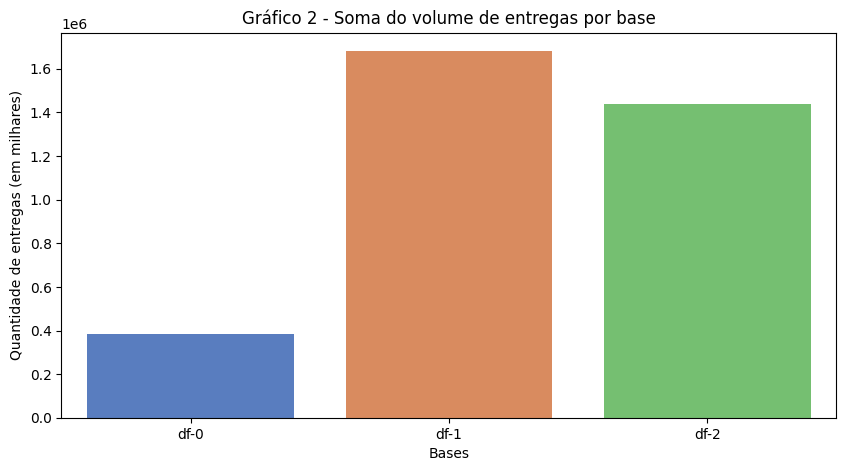

In [37]:
display(grafico_2)

**2° Insight** - Nesse gráfico analisamos melhor a diferença de entregas de cada base, nota-se que a base 0 tem mais que 60% a menos entregas que as demais, porém isso não é algo que automaticamente faça dessa base a menos importante.
Pelo falta de dados mais especificos fico impossibilitado de análisar essa área, porém antes de entender o real motivo para essa base ter menos entragas temos que entender outros fatores como, rentabilidade, gastos, a quanto tempo a base foi iniciada e até mesmo o tipo de região em que ela se encontra.
Portanto, é importante considerar varios outros fatores e dados antes de termos algum insight favorável sobre isso.

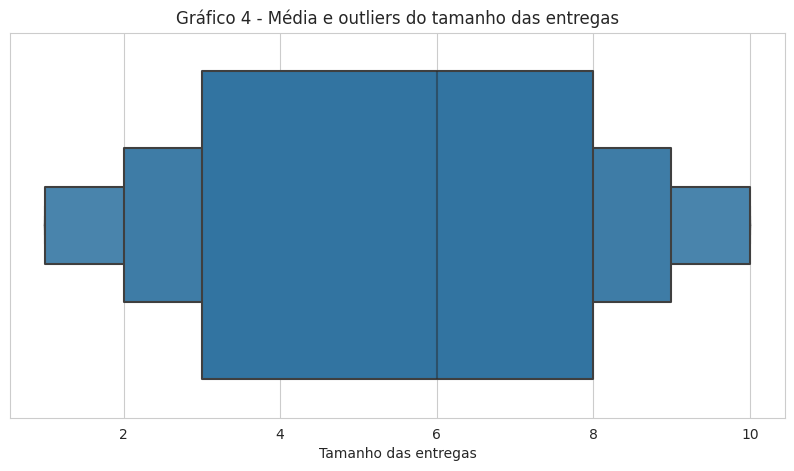

In [38]:
display(grafico_3)

**3° Insight** - Usamos esse gráfico para retirar outliers dos dados e com isso temos uma base da média de tamanho das entregas.
 Perante a isso ficamos tranquilos quanto à falta de espaço nos caminhões, pois praticamente todos tem seu espaço de 180 então é possivel tranportar varias entregas de uma só vez e com isso otimizando tempo.

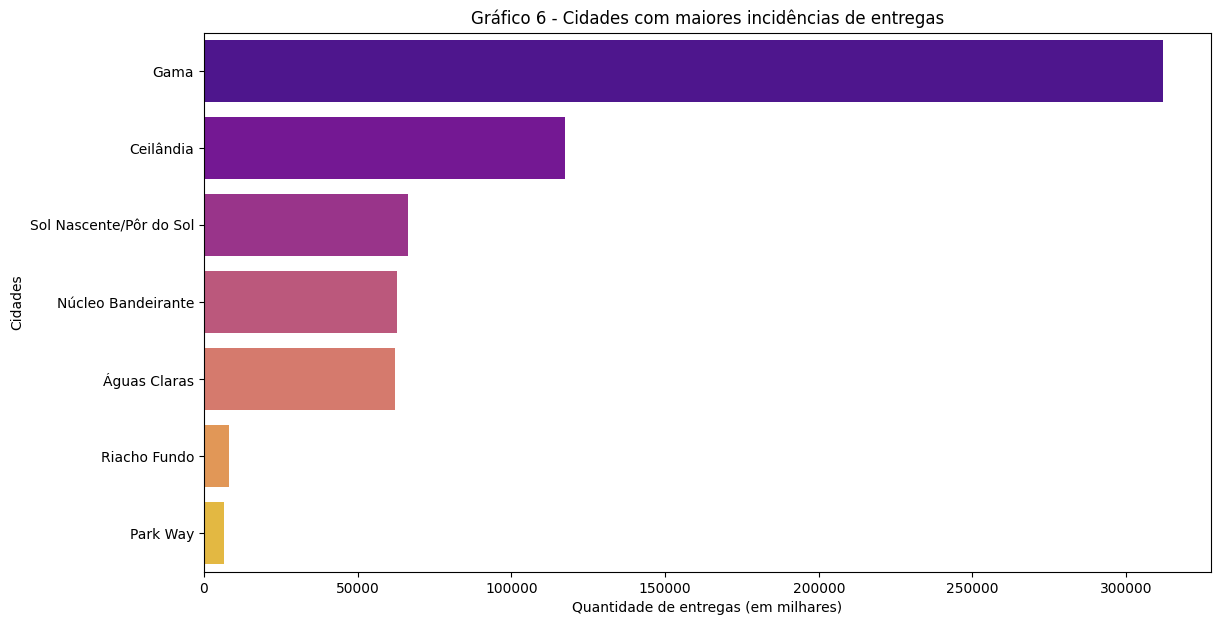

In [39]:
display(grafico_4)

**4° Insight** - Quantidade de entregas por cidade é uma ótima maneira de entender e atualizar as rotas de cada base para uma melhor agilidade nas entregas ou talvez transferir uma parte da frota de uma região para outra dependendo da demanda.

**Resumo dos insights** - Em resumo, com a pouca quantidade de dados que eu tive para analisar fica um pouco difícil tirar muitas soluções e melhorias para a área, porém estive pensando em dados úteis para essa análise, como as rotas das entregas e o combustível gasto para as respectivas, isso daria uma noção enorme do que melhorar para otimizar o gasto e a velocidade das entregas.
Outro dado útil seria o peso da carga, pois não temos medidas especificas nos dados, então pode sim ter uma carga de "10" que tenha um peso muito alto para o caminhão suportar levar junto com muitas outras.
E por ultimo um dado para controle da empresa que é útil são os status das entregas  como por exemplo, concluída, em andamento, 10 dias para atraso, atrasada e o rastreio do pacote para o cliente, não necessariamente muito preciso mas é sim interessante o cliente ter esse feedback.

# 7.Referências


Informações sobre a Loggi: https://www.loggi.com/conheca-a-loggi/

Informações sobre Know-How: https://pt.wikipedia.org/wiki/Saber-fazer#:~:text=O%20termo%20em%20ingl%C3%AAs%20know,de%20como%20executar%20alguma%20tarefa.

Informações sobre a Loggi: https://pt.wikipedia.org/wiki/Loggi

Documentação SeaBorn: https://seaborn.pydata.org/tutorial/color_palettes.html